# Machine learning Coursera Ex 1 - Linear Regression

##   Single variable linear regression

### Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('ex1data1.txt',index_col=False,header=None,names=['Population','Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the Data

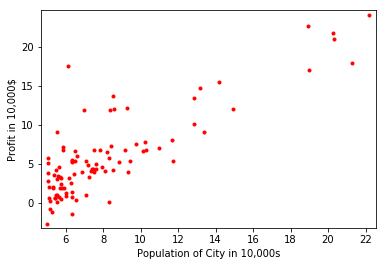

In [3]:
%matplotlib inline
plt.plot(data1['Population'],data1['Profit'],linestyle='None',marker='.',color='red')
plt.margins(0.02)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000$')
plt.show()


### Gradient Descent

#### implementation

In [4]:
X = np.c_[np.ones(data1.shape[0]),data1.iloc[:,0].as_matrix()]
y = np.c_[data1.iloc[:,1].as_matrix()]
theta = np.zeros(shape=(1,2)) #initialize fitting parameters
iterations = 1500;
alpha = 0.01;

#### Computing the cost J(*theta*) 

$$J(\theta)={\frac{1}{2m}} \sum(h_\theta(x^i)-y^i)^2 $$


In [5]:
def computeCost(X,y,theta):
    #COMPUTECOST Compute cost for linear regression#
    #computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
    m = len(y) # number of training examples 
    J = np.sum(( X.dot(theta.T) - y)**2) * (1/(2*m))   #Cost function
    return J
    

#### Gradient Descent


$$ \theta_j :=\theta_j- \alpha\frac{1}{m} \sum(h_\theta(x^i)-y^i)x_j^i $$
(simultaneously update parameter (j) for all j)


In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    m = len(y)
    J_history = np.zeros(shape=(num_iters, 1))
    theta_vals = np.zeros(shape=(num_iters, theta.shape[1]))
    for i in range(num_iters):
        theta = theta - ((X.dot(theta.T)-y).T.dot(X))*(alpha/m)
        #theta = theta-((theta.dot(X.T)-y).dot(X))*(alpha/m)
        theta_vals[i] = theta
        J_history[i] = computeCost(X,y,theta)
        
    return theta,J_history,theta_vals
        
    


In [8]:
theta,J_history,theta_vals = gradientDescent(X, y, theta, alpha, iterations)

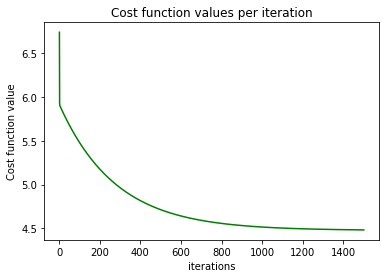

In [10]:
plt.plot(np.array(range(1,iterations+1)),J_history,color='green')
plt.xlabel('iterations')
plt.ylabel('Cost function value')
plt.title('Cost function values per iteration')
plt.show()

#### Prediction

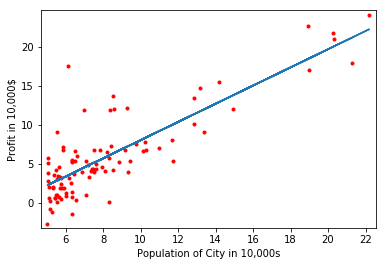

In [11]:
plt.plot(data1['Population'],data1['Profit'],linestyle='None',marker='.',color='red')
plt.plot(data1['Population'],X.dot(theta.T))
plt.margins(0.02)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000$')
plt.show()

In [12]:
#prediction for 35k population
prediction1 = np.c_[1,3.5].dot(theta.T)*10000
print(prediction1)

[[ 4519.7678677]]


In [530]:
#prediction for 70k population
prediction2 = np.c_[1,7].dot(theta.T)*10000
print(prediction2)

[[ 45342.45012945]]


## Multi-Variable linear regression

In [13]:
data2 = pd.read_csv('ex1data2.txt',index_col=False,header=None,names=['Size (sq feet)','Number of bedrooms','Price'])
data2.head()

,Size (sq feet),Number of bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalization

In [14]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #FEATURENORMALIZE(X) returns a normalized version of X where
    #the mean value of each feature is 0 and the standard deviation is 1.
    mu = np.mean(X,axis=0)             
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

### Gradient Descent

In [15]:
# The first implementation of Gradient descent support multivariate linear regression as well 
#append column of ones for theta-zero 
X = np.array(data2.drop('Price',axis=1))
y = np.c_[data2.iloc[:,2].as_matrix()]
NormX,mu,sigma = featureNormalize(X)
NormX= np.c_[np.ones(NormX.shape[0]),NormX]
X = np.c_[np.ones(X.shape[0]),X]
theta = np.zeros(shape=(1,3)) #initialize fitting parameters
iterations = 50
alpha = 0.1
theta,J_history,theta_vals = gradientDescent(NormX, y, theta, alpha, iterations)

In [16]:
theta

array([[ 338658.2492493 ,  103322.82942954,    -474.74249522]])

In [17]:
#prediction for  1650 sq feet with 3 rooms 
size = 1650;room=3
prediction3 = np.c_[1 ,(size-mu[0]/sigma[0]) ,(room-mu[1]/sigma[1])].dot(theta.T)
print('Predicted price for a %s sq-ft, %s bedrooms house is %s$: '%(size,room,int(prediction3)))

Predicted price for a 1650 sq-ft, 3 bedrooms house is 170558972$: 


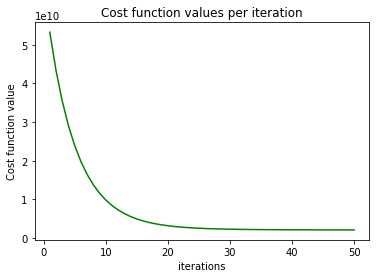

In [18]:
plt.plot(np.array(range(1,iterations+1)),J_history,color='green')
plt.xlabel('iterations')
plt.ylabel('Cost function value')
plt.title('Cost function values per iteration')
plt.show()